# Title: Final_Report

### Group members:
* Audrey Wang 41935289
* Sam Shan 85179604
* Dima Zubkovskii 61142865
* Michelle Sui 93853489

# Introduction

Diabetes is a chronic (long-lasting) health condition that affects how body turns food into energy. Body breaks down most of the food people eat into sugar (glucose) and releases it into the bloodstream. When the blood sugar goes up, it signals the pancreas to release insulin. Insulin acts like a key to let the blood sugar into the body’s cells for use as energy. However, with diabetes, patient's body doesn’t make enough insulin or can’t use it as well as it should. Moreover, gestational diabetes develops in pregnant women who have never had diabetes. If a patient have gestational diabetes, their baby could be at higher risk for health problems. Gestational diabetes usually goes away after your baby is born. However, it increases a patient's risk for type 2 diabetes later in life. (Center for Disease Control and Prevention, 2023) 

Early diagnosis and intervention can significantly alter the course of this disease, improving the quality of life for those affected. Recognizing the critical role of timely and accurate diagnostics, our project is inspired by a dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. This data provides a unique opportunity to utilize machine learning for predictive analysis in a medical context.
The dataset focuses on a specific subset of the population - women of Pima Indian heritage who are 21 years or older. It includes several medical predictor variables alongside one target variable, Outcome, indicating the presence or absence of diabetes. Our project aims to leverage the capabilities of artificial intelligence and data analytics to **develop a robust model that can predict the onset of diabetes in patients based on the diagnostic measurements provided in the dataset.** By doing so, we seek not only to contribute to the advancement of medical diagnostics but also to support preventive health measures among high-risk populations.



# Data Description:

For our research, we are using the data from Kaggle, which was originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases.to predict if a patient from a group of 21 years and older women of Pima Indian heritage will have diabetes based on the next factors, which can be found as columns in the original comma separated valuetable:
* **Pregnancies**: the number of times pregnant
* **Glucose**:  plasma glucose concentration
* **BloodPressure**: diastolic blood pressure (in mmHg)
* **SkinThickness**: triceps skin fold thickness (mm) 
* **Insulin**: 2-hour serum insulin (in U/ml)
* **BMI**: body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: diabetes pedigree function 
* **Age**: age (in years)
* **Outcome**: 0 or 1 (0 means that a patient does not have diabetes, 1 means that a patient has)

# Methods
## 1. Preprocessing and exploratory data analysis
**1). Loads data from the original source on the web**

We uploaded the raw dataset to GitHub, stored the URL in the `URL` variable, and then read the data using read_csv. And imported necessary libraries like `tidyverse` and `tidymodels` for our planned data manipulation we are now able to load in our dataset as an R data frame.

**2). Wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis**

Prepare the data by renaming the columns to more accessible names by standardizing them to lowercase for consistency, then converting `outcome` to a factor with `as_factor` function as we are working on a categorical question. This ensures it is in a suitable format for analysis.

**3). Sets the seed value and splits the data into training and testing sets, working only with the training set until the very end.**

The sees value remains unchanged in this report. And we will use 70% of the data for training and 30% for testing.

**4). Performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis.**

We explored and summarized the dataset by calculating mean for relevant variables. For the categorical variable `outcome`, we found that cases where it is '0' are almost twice as common as cases where it is '1,' indicating a data imbalance. Since the majority of cases are '0,' this can skew prediction results towards '0,' affecting accuracy. To correct this imbalance, we will use the `upsample` function when creating the recipe.

Also, we have found out that missing data was prevalent in two factors: insulin and skin_sickness. We have concluded that these factors cannot play a predictor role in the final analysis.

In every other factors, the amount of missing data was less than 1%. we have selected the following six quantitative variables as our predictors.
* `Pregnancies`: the number of times pregnant
* `Glucose`:  plasma glucose concentration
* `BloodPressure`: diastolic blood pressure (in mmHg)
* `BMI`: body mass index (weight in kg/(height in m)^2)
* `DiabetesPedigreeFunction`: diabetes pedigree function 
* `Age`: age (in years)

**5). Visualizes the distribution of each variable**

We created histograms to visualize the distribution of key predictor variables. And by distinguishing different groups with colors, we can more intuitively see the distribution characteristics of predictors across different groups.
Looking at our plot, we found that the distribution of these six variables across different groups differs only in terms of the number of people, and this difference will be corrected by upsampling later, resulting in no significant differences in the trends and means of variable distribution between groups. The lack of distinct predictor distribution characteristics between groups could adversely affect the accuracy of our model.

## 2. Performs the data analysis
**1). Set up cross-validation to increase the accuracy**

**2). Create classification recipe and make the training data centered and scaled**

**3). Find the best K value by using `neighbours = tune()` in the k-nearest model function**

**4). Plot the results/accuracies of the K values**

**5). Train our classification model with the best k value**


## 3. Testing the model through test dataset
## 4. Evaluating model's performance by computing accuracy, precision and recall.


# Code:
## 1. Preliminary exploratory data analysis

### 1). Loads data from the original source on the web


In [80]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(recipes)
install.packages("themis")
library(themis)

also installing the dependencies ‘RANN’, ‘ROSE’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
URL <- "https://raw.githubusercontent.com/audrey-rw5683/dsci-100-2023w2-group-002-2/main/diabetes.csv"
diabetes_data <- read_csv(URL)
head(diabetes_data)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


## 2. Wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis:

In [82]:
# rename colunms to lowercase
diabetes <- rename(diabetes_data,
                 pregnancies =  Pregnancies,
                 glucose = Glucose,
                 blood_pressure = BloodPressure,
                 skin_sickness = SkinThickness,
                 insulin = Insulin,
                 bmi = BMI,
                 diabetes_pedigree_function = DiabetesPedigreeFunction,
                 age = Age,
                 outcome = Outcome)
# we will be working with outcome as a categorical variable, we will convert it to a factor using the function as_factor.
diabetes <- diabetes |>
    mutate(outcome = as_factor(outcome))

head(diabetes)

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


### 3). Set the seed value and split the data into training and testing sets, working only with the training set until the very end

#### a) Set seed value

In [3]:
set.seed(123) #do not change the value.

#### b) Split the data
* We will use 70% of the data for training and 30% for testing.

In [199]:
diabetes_split <- initial_split(diabetes, prop = 0.7, strata = outcome)  
diabetes_train <- training(diabetes_split)   
diabetes_test <- testing(diabetes_split)
glimpse(diabetes_train)
glimpse(diabetes_test)

Rows: 537
Columns: 9
$ pregnancies                <dbl> 1, 10, 4, 1, 1, 13, 5, 3, 10, 7, 7, 7, 1, 2…
$ glucose                    <dbl> 89, 115, 110, 103, 97, 145, 109, 88, 122, 1…
$ blood_pressure             <dbl> 66, 0, 92, 30, 66, 82, 75, 58, 78, 84, 92, …
$ skin_sickness              <dbl> 23, 0, 0, 38, 15, 19, 26, 11, 31, 0, 18, 0,…
$ insulin                    <dbl> 94, 0, 0, 83, 140, 110, 0, 54, 0, 0, 0, 0, …
$ bmi                        <dbl> 28.1, 35.3, 37.6, 43.3, 23.2, 22.2, 36.0, 2…
$ diabetes_pedigree_function <dbl> 0.167, 0.134, 0.191, 0.183, 0.487, 0.245, 0…
$ age                        <dbl> 21, 29, 30, 33, 22, 57, 60, 22, 45, 37, 48,…
$ outcome                    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
Rows: 231
Columns: 9
$ pregnancies                <dbl> 6, 1, 8, 5, 10, 5, 1, 3, 8, 7, 9, 10, 7, 5,…
$ glucose                    <dbl> 148, 85, 183, 116, 139, 166, 115, 126, 99, …
$ blood_pressure             <dbl> 72, 66, 64, 74, 80, 72, 70, 88, 84, 90, 80,

### 4). Performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis

Explore and summarize the dataset by calculating mean for relevant variables and create histograms to visualize the distribution of key predictor variables.

In [2]:
#the number of observations in each class
num_obs <- nrow(diabetes_train)
diabetes_outcomes <- diabetes_train |>
                    group_by(outcome) |>
                    summarize(count = n(), percentage = n() / num_obs * 100)

diabetes_outcomes

ERROR: Error in eval(expr, envir, enclos): object 'diabetes_train' not found


In our training set, we have 350 observations with `outcome = 0`, and 187 observations with `outcome = 1`. The number of patients without diabetes is greater than the number of patients with diabetes which causes a class imbalance, which could potentially impact the predictions of our model. We plan to incorporate oversampling method into the recipe creation process to address this issue.

In [201]:
# the means of the variables
diabetes_stat <- diabetes_train |>
    summarize(across(pregnancies:age, mean))
diabetes_stat

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.793296,120.3892,68.48417,20.70391,79.8622,32.3838,0.471311,33.14153


In [210]:
# the number of observations have missing values
# pregnancies can be 0
# 0 represents missing values for other numerical variables
diabetes_missing <- diabetes_train |>
    filter(glucose == 0 | blood_pressure == 0 | skin_sickness == 0 | insulin == 0 | bmi == 0 | diabetes_pedigree_function == 0 | age == 0)
head(diabetes_missing)
diabetes_missing_num <- diabetes_missing |>
  summarize(missing_count_total = n())
diabetes_missing_num
zero_counts <- diabetes_train |>
  summarize(across(pregnancies:age, ~ sum(. == 0))) |> pivot_longer(cols = glucose:age, names_to = "variable", values_to = "count_missing")
zero_counts

pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
10,115,0,0,0,35.3,0.134,29,0
4,110,92,0,0,37.6,0.191,30,0
5,109,75,26,0,36.0,0.546,60,0
10,122,78,31,0,27.6,0.512,45,0
7,133,84,0,0,40.2,0.696,37,0
7,106,92,18,0,22.7,0.235,48,0


missing_count_total
<int>
261


pregnancies,variable,count_missing
<int>,<chr>,<int>
79,glucose,4
79,blood_pressure,30
79,skin_sickness,156
79,insulin,259
79,bmi,7
79,diabetes_pedigree_function,0
79,age,0


We have 261 records with missing values, among which 298 contain missing values for `insulin` and 181 for `skin_sickness`. Due to the high number of missing values in these two variables, we do not currently intend to use them as predictors. For the rest of the missing values, since they involve a small amount of data, we'll exclude those rows during model training.

### 5). Visualizes the distribution of each variable

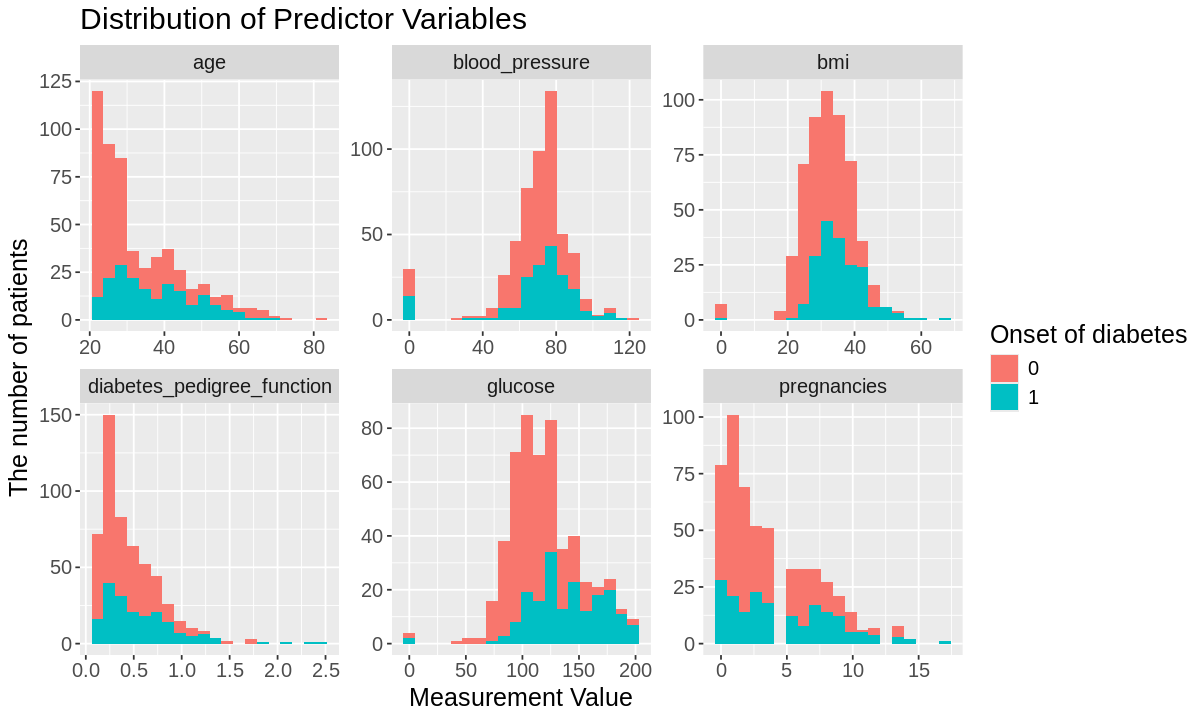

In [202]:
options(repr.plot.width = 10, repr.plot.height = 6)
# plot the distribution of each of the variables
distri <- diabetes_train |>
  select(pregnancies, glucose, blood_pressure, bmi, diabetes_pedigree_function, age, outcome)|>
  pivot_longer(cols = pregnancies:age) |>
  ggplot(aes(x = value, fill = outcome)) +
  geom_histogram(bins = 20) +
  facet_wrap(~ name, scales = "free") +
  labs(title = "Distribution of Predictor Variables", y = "The number of patients", x = "Measurement Value", fill = "Onset of diabetes") +
  theme(text = element_text(size = 15))
distri

## 4. Performs the data analysis:

We will answer our question by creating a classifaction model based on pregnancies, glucose, blood pressure, skin sickness, insulin, bmi and diabetes pedigree function

First, we need to decide which k value yields the best accuracy. To do this we will perform a 5-fold cross validation with K values ranging from 1 to 25. We chose ranges from 1- 25 since we believe it is a wide enoguh range to find a good K value and chose to use 5 folds since it is enough accuraccy for out project.

### 1). Set up cross-validation to increase the accuracy
### 2). Create classification recipe and make the training data centered and scaled
### 3). Find the best K value by using `neighbours = tune()` in the k-nearest model function

In [1]:
set.seed(123) #do not change the value.

options(repr.plot.height = 4, repr.plot.width = 5)
# create recipe using selected variables as predictors
diabetes_mnist_recipe <- recipe(outcome ~ pregnancies + glucose + bmi + blood_pressure + diabetes_pedigree_function + age, data = diabetes_train) |>
                        step_upsample(outcome, over_ratio = 1) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())
#
# create 5 fold cross validation
diabetes_mnist_vfold <- vfold_cv(diabetes_train, v = 8, strata = outcome)

# create the KNN spec to determine most accurate K value
diabetes_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# get the results of the prediction where K is between 1 and 50
diabetes_knn_results <- workflow() |>
                 add_recipe(diabetes_mnist_recipe) |>
                 add_model(diabetes_knn_spec) |>  
                 tune_grid(resamples = diabetes_mnist_vfold, grid = tibble(neighbors = seq(1, 50, by = 1))) |>
                 collect_metrics() |>
                 filter(.metric == 'accuracy') 
best_k_value <- diabetes_knn_results |>
                 arrange(-mean) |>
                 slice(1)
best_k_value


ERROR: Error in step_center(step_scale(step_upsample(recipe(outcome ~ pregnancies + : could not find function "step_center"


### 4). Plot the results/accuracies of the K values

In [ ]:
# plot the results/accuracies of the K values
diabetes_cross_val_plot <- ggplot(diabetes_knn_results, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  #geom_text(aes(label = neighbors), vjust = 4) + 
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') 

diabetes_cross_val_plot

From the graph we can see that k = 28 gets the best accuracy, so we will use k = 28 to train our classification model. Next we will train another classification model with k = 28. This model will help predict if a patient has diabetes or not.

### 5). Train our classification model with the best k value

In [238]:
set.seed(123) #do not change the value.

# create knn spec with k = 22
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 28) |>
            set_engine("kknn") |>
            set_mode("classification")

#knn_recipe <- recipe(outcome ~ ., data = diabetes_train) |>
                        #step_scale(all_predictors()) |>
                        #step_center(all_predictors())

knn_fit <- workflow() |>
                    add_recipe(diabetes_mnist_recipe) |>
                    add_model(knn_spec) |>
                    fit(data = diabetes_train)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_upsample()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(28,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2385714
Best kernel: rectangular
Best k: 28

## 3. Testing

Now that we have the model trained, lets assess the accuracy and precision of our model using our testing data.

In [239]:
set.seed(123) #do not change the value.

diabetes_test_predictions <- predict(knn_fit, diabetes_test) |>
  bind_cols(diabetes_test) #add the column of predictions to the original test data.
head(diabetes_test_predictions)

diabetes_accuracy <- diabetes_test_predictions |>
  metrics(truth = outcome, estimate = .pred_class) |>
  filter(.metric == "accuracy")

diabetes_accuracy

.pred_class,pregnancies,glucose,blood_pressure,skin_sickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
0,5,116,74,0,0,25.6,0.201,30,0
1,10,139,80,0,0,27.1,1.441,57,0
1,5,166,72,19,175,25.8,0.587,51,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7489177


It looks like our model has an accuracy of around 74%. 

## Compute the precision and recall

In [240]:
# Lets first check the order of labels in outcome.
label_order <- diabetes_test_predictions |> pull(outcome) |> levels()
label_order

[1] "0" "1"

since 1 (has diabetes) is the second label, we'll set the "positive" outcome as the second level when computing precision and recall.

In [241]:
diabetes_precision <- diabetes_test_predictions |>
  precision(truth = outcome, estimate = .pred_class, event_level = "second")
diabetes_precision

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6161616


In [243]:
diabetes_recall <- diabetes_test_predictions |>
  recall(truth = outcome, estimate = .pred_class, event_level = "second")
diabetes_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.7530864


The output shows that the estimate precision of the classifier is 61% and the estimated recall of the classifier is 75%.

## Confusion Matrix

In [244]:
confusion <- diabetes_test_predictions |>
             conf_mat(truth = outcome, estimate = .pred_class)
confusion

          Truth
Prediction   0   1
         0 112  20
         1  38  61

It looks like our classification model is doing a really poor job at diagnosing people that has diabetes with diabetes but is doing fairly well with predicting if a patient doesn't have diabetes. This might be partly because we have significantly more people that don't have diabetes in our dataset that might be affecting how our model is being trained.

## Analyze performance

Lets see if our accuracy, precision and recall is actually good by comparing it agains the majority classifier. Our goal is to improve on the accuracy from just guessing from the majority outcome label from our training data (0, doesn't have diabetes). Recall that our dataset proportions are as follows:

In [245]:
diebetes_proportions <- diabetes_train |>
                      group_by(outcome) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(diabetes_train))

diebetes_proportions

outcome,n,percent
<fct>,<int>,<dbl>
0,350,65.17691
1,187,34.82309


Since the majority is 0, we can suspect that the majority classifier would have an accuracy of around 65%. The classification model we build improved on that with an accuracy of around 75%.

# Discussion
## Summarize what you found

  The analysis using a K-Nearest Neighbors classifier on the diabetes dataset yielded an overall accuracy of around 75%. The recall for the model was also evaluated, indicating how well the model identifies actual cases of diabetes. These numbers suggest that while the model performs reasonably well, there is significant room for improvement, especially in terms of precision and recall.
  
## discuss whether this is what you expected to find

The expectations were to uncover significant patterns that could help in diagnosing diabetes or understanding its progression. The obtained accuracy aligns reasonably with initial expectations for a base model, however, the precision and recall might be lower than expected, particularly given the potential severity and complications associated with diabetes.

## discuss what impact could such findings have

The model's moderate accuracy suggests that while useful, it might not yet be sufficient for clinical application without further tuning and validation. Future work could explore integrating lifestyle factors like diet and physical activity to enhance predictive power. Additionally, deploying the model across diverse demographics could help tailor diabetes screening and prevention strategies more effectively.

## discuss what future questions could this lead to

- How can the model's precision and recall be improved? Would other algorithms offer better performance? Exploring different models might yield better results.- 
Which features most strongly predict diabetes, and are there other variables that should be considered? Investigating the impact of lifestyle factors and genetics could be insightful.- 
Does the model perform equally well across different demographics? Analyzing the model's performance across various age groups, ethnicities, and genders could uncover important disparities in diabetes prevalence.


# Bibliography  * Center for Disease Control and Prevention (2023). CDC
  https://www.cdc.gov/diabetes/basics/diabetes.html#:~:text=Diabetes%20is%20a%20chronic%20
* Pima Indians Diabetes Database (n.d.). Kaggle
  https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv
* The creators of the Pima Indians Diabetes database:
  Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.Press. 
